In [8]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import plotly.express as px
import plotly.graph_objects as go

In [10]:
with open('00_voxel_candidate_graph.pkl', 'rb') as jar:
    neighborhood_graph = pickle.load(jar)
with open('00_route_path.pkl', 'rb') as jar:
    route, full_path = pickle.load(jar)
with open('00_another_pkl.pkl', 'rb') as jar:
    ncfp_0, co, C = pickle.load(jar)

# manual definition to override pickle load:
# route = [3386, 3517, 5154, 4201, 5161, 262, 2548, 4842, 3386]
route = [154, 171, 41, 141, 86, 300, 266, 269, 7, 183, 92, 106, 94, 14, 255, 78, 327, 205, 1, 70, 150, 60, 135, 186, 302]
# full_path = [3386, 3972, 4807, 3468, 3466, 3843, 3465, 3365, 3271, 3298, 3358, 3296, 4799, 4042, 3172, 3735, 3225, 3224, 4349, 3879, 4984, 3888, 4200, 3712, 3093, 3550, 4256, 4328, 3841, 4466, 4546, 3047, 3730, 3783, 4404, 3536, 4043, 3244, 4946, 3579, 3731, 4997, 4999, 4331, 3824, 4897, 3719, 3208, 3205, 4670, 4226, 4955, 4521, 4909, 4910, 3557, 3275, 4915, 4917, 4971, 3228, 4924, 4929, 3269, 3517, 3517, 3269, 4929, 5045, 5154, 5154, 5044, 3228, 4803, 4691, 4631, 3217, 5039, 4415, 3963, 4478, 4210, 4208, 4207, 4202, 4201, 4201, 4198, 4299, 4302, 3497, 3025, 3068, 3375, 3196, 3801, 4218, 3775, 5161, 5161...

In [ ]:
route = [154, 171, 41, 141, 86, 300, 266, 269, 7, 183, 92, 106, 94, 14, 255, 78, 327, 205, 1, 70, 150, 60, 135, 186, 302]

In [12]:
with open('00_candidate_eval.pickle', 'rb') as jar:
    wot = pickle.load(jar)

FileNotFoundError: [Errno 2] No such file or directory: '00_candidate_eval.pickle'

In [ ]:
candidates = wot[0]

In [13]:
with open('overlap_relative.pickle', 'rb') as jar:
    overlap_rel = pickle.load(jar)

FileNotFoundError: [Errno 2] No such file or directory: 'overlap_relative.pickle'

In [ ]:
from helpers import best_neighbors
ncfp_0, co = best_neighbors(route, overlap_rel, candidates)

In [ ]:
!pip install scipy

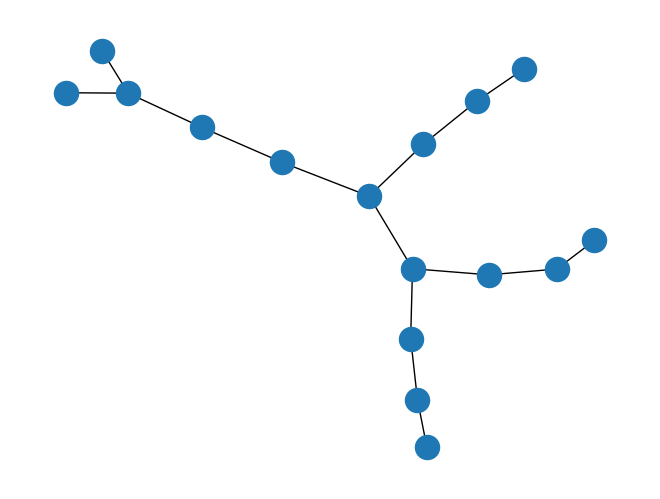

In [14]:
T = nx.Graph()
for _ in ncfp_0:
    T.add_node(_['ids'][0])
    T.add_node(_['ids'][1])
    T.add_edge(_['ids'][0], _['ids'][1])
nx.draw(T)
plt.show()

In [ ]:
co

In [ ]:
ncfp = pd.DataFrame(ncfp_0)
ids = []
for idpair in ncfp['ids']:
    for id_ in idpair:
        if id_ not in ids:
            ids.append(id_)
len(route)

In [ ]:
ncfp

In [ ]:
df = []
coords = np.asarray([np.asarray(neighborhood_graph.nodes[_]['coord']) for _ in neighborhood_graph])
for _ in coords:
    df.append(
        {
            'data': 'candidate',
            'x': _[0],
            'y': _[1],
            'z': _[2],
            'size': .25,
            'color': 'candidates'
        }
    )
coords_choice = np.asarray([np.asarray(neighborhood_graph.nodes[_]['coord']) for _ in route])
for _ in coords_choice:
    df.append(
        {
            'data': 'choice',
            'x': _[0],
            'y': _[1],
            'z': _[2],
            'size': 4,
            'color': 'strategy viewpoints'
        }
    )
df = pd.DataFrame(df)    

critical_double = []
list_of_pt = []
for pair in ncfp['ids']:
    for pt in pair:
        if pt not in list_of_pt:
            list_of_pt.append(pt)
            critical_double.append(
                {
                    'data': 'connectivity',
                    'pt': pt,
                    'x': neighborhood_graph.nodes[pt]['coord'][0],
                    'y': neighborhood_graph.nodes[pt]['coord'][1],
                    'z': neighborhood_graph.nodes[pt]['coord'][2],
                    'color': 5,
                    'dash': 'dash'
                }
            )
critical_double = pd.DataFrame(critical_double)

#critical = np.asarray([np.asarray(neighborhood_graph.nodes[_]['coord']) for _ ])
coords_path = np.asarray([np.asarray(neighborhood_graph.nodes[_]['coord']) for _ in full_path])
# for _ in coords:
#     df.append(
#         {
#             'data' = 'path'
#             'x' = _[0],
#             'y' = _[1],
#             'z' = _[2]
#         }
#     )

# df_coords = pd.DataFrame(coords, columns=['x', 'y', 'z'])
# df_coords['size'] = 2
# df_coords_choice = pd.DataFrame(coords_choice, columns=['x', 'y', 'z'])
# df_coords_choice['size'] = 2
df_coords_full_path = pd.DataFrame(coords_path, columns=['x', 'y', 'z'])
df_coords_full_path['color'] = 'path'

In [ ]:
critical_double

In [ ]:
fig1 = px.scatter_3d(df, x='x', y='y', z='z', size='size', color= 'color')
fig2 = px.line_3d(df_coords_full_path, x='x', y='y', z='z', color= 'color')
fig_x = px.line_3d(critical_double, x='x', y='y', z='z', color='color')
#fig4 = px.scatter_3d(df_coords_choice, x='x', y='y', z='z')

# fig1.update_traces(marker=dict(size=2), color='b')
# fig2.update_traces(marker=dict(size=2), color='r')




pair= ncfp['ids'][0]
df_pair = critical_double[(critical_double['pt'] == pair[0]) | (critical_double['pt'] == pair[1])]
fig7 = px.line_3d(df_pair,
            x='x', y='y', z='z', color='color'
        )
#fig7.show()
for pair in ncfp['ids']:
    df_pair = critical_double[(critical_double['pt'] == pair[0]) | (critical_double['pt'] == pair[1])]
    #print(df_pair)
    fig7.add_trace(
       go.Scatter3d(x=df_pair.x, y=df_pair.y, z=df_pair.z, mode='lines')
    )
    fig7.update_traces(marker=dict(color=5))

fig3 = go.Figure(data=fig7.data + fig1.data) # + fig_x.data) # + fig4.data)
#fig3.update_traces(marker=dict(size=5))
#scene=dict(camera=dict(eye=dict(x=1.15, y=1.15, z=0.8)), #the default values are 1.25, 1.25, 1.25
#           xaxis=dict(),
#           yaxis=dict(),
#           zaxis=dict(),
#           aspectmode='manual', #this string can be 'data', 'cube', 'auto', 'manual'
#           #a custom aspectratio is defined as follows:
#           aspectratio=dict(x=1, y=1, z=0.2)
#           )
#fig3.update_layout(aspectmode='manual', aspectratio=dict(x=1, y=1, z=2))
#fig3.layout.update(height=600, width=1000)

# range_i min, max, size, center
range_x = [min(df.x), max(df.x), max(df.x) - min(df.x), min(df.x) + 0.5 * (max(df.x) - min(df.x))]
range_y = [min(df.y), max(df.y), max(df.y) - min(df.y), min(df.y) + 0.5 * (max(df.y) - min(df.y))]
range_z = [min(df.z), max(df.z), max(df.z) - min(df.z), min(df.z) + 0.5 * (max(df.z) - min(df.z))]
axis_size = 1 * max([range_x[2], range_y[2], range_z[2]])
axis_range_x = [range_x[3] - axis_size / 2, range_x[3] + axis_size / 2]
axis_range_y = [range_y[3] - axis_size / 2, range_y[3] + axis_size / 2]
axis_range_z = [range_z[3] - axis_size / 2, range_z[3] + axis_size / 2]


aspectratio_x = range_x[2] / axis_size
aspectratio_y = range_y[2] / axis_size
aspectratio_z = range_z[2] / axis_size

margin_i = axis_size * 0.1


# fig3.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=4, range=axis_range_x,),
#         yaxis = dict(nticks=4, range=axis_range_y,),
#         zaxis = dict(nticks=4, range=axis_range_z,),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))

fig3.update_layout(
    scene_aspectmode='data',
    scene_aspectratio=dict(x=aspectratio_x, y=aspectratio_y, z=aspectratio_z),
    margin=dict(
        r=margin_i,
        l=margin_i,
        b=margin_i,
        t=margin_i
    )
)

fig3.show()

In [ ]:
fig1 = px.scatter_3d(df[df['data'] == 'choice'], x='x', y='y', z='z', size='size', color= 'color')
fig2 = px.line_3d(df_coords_full_path, x='x', y='y', z='z', width=50)
#fig4 = px.scatter_3d(df_coords_choice, x='x', y='y', z='z')

# fig1.update_traces(marker=dict(size=2), color='b')
# fig2.update_traces(marker=dict(size=2), color='r')



fig3 = go.Figure(fig2.data + fig1.data) # + fig4.data)
#fig3.update_traces(marker=dict(size=5))

# fig3.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=4, range=axis_range_x,),
#         yaxis = dict(nticks=4, range=axis_range_y,),
#         zaxis = dict(nticks=4, range=axis_range_z,),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))

fig3.update_layout(
    scene_aspectmode='data',
    scene_aspectratio=dict(x=aspectratio_x, y=aspectratio_y, z=aspectratio_z),
    margin=dict(
        r=margin_i,
        l=margin_i,
        b=margin_i,
        t=margin_i
    )
)



fig3.show()

In [ ]:
df

In [ ]:
fig = px.scatter_3d(f, x="overlap", y="coverage", z="count",
#                    color_discrete_map={
#                             "random initial": "grey",
#                             "greedy best first": "orange",
#                             "greedy weighted": "yellow",
#                             "GA 1": "blue"
#                         },
                   color=f["experiment"])
fig.update_traces(marker=dict(size=5, opacity=0.5)) #colorscale='temps', color=f["source"], opacity=0.75))
fig.show()